# Chapter 18. 시퀀스 배열로 다루는 순환 신경망(RNN)





In [17]:
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist, reuters, imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(f"python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"tensorflow: {tf.__version__}")

python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy: 1.25.2
pandas: 1.5.3
sklearn: 1.2.2
matplotlib: 3.7.1
seaborn: 0.13.1
tensorflow: 2.15.0


순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법.  
그리고 기억된 데이터가 얼마나 중요한지 판단하고 별도의 가중치를 주어 다음 데이터로 넘김

RNN 이 처음 개발된 이후, RNN의 결과를 더욱 개선하기 위한 노력이 계속되어 았음

이 중에서 LSTM(Long Short Term Memory) 방법을 함께 사용하는 기법이 현재 가방 널리 사용되고 있음

LSTM 은 한 층 안에서 반복을 많이 해야 하는 RNN 의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법.  
즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 여부를 관리하는 단계를 하나 더 추가하는 것

RNN 방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 적용할 수 있음

> 문장을 읽고 뜻을 파악할 때, 사진의 캡션을 만들 때, 문장을 번역할 때

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


기사 안의 단어 중에는 거의 사용되지 않는 것들도 있음 -> 모든 단어를 다 사용하는 것은 비효율적이므로 빈도가 높은 단어만 불러와 사용
> 이떄 사용하는 인자가 바로 테스트셋과 학습셋으로 나눌 떄 함께 적용했던 `num_words=1000`의 의미

In [5]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh')) # LSTM의 활성화 함수로는 tanh 를 주로 사용
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])


Epoch 1/200
450/450 [==============================] - 26s 51ms/step - loss: 2.2003 - accuracy: 0.4421 - val_loss: 1.8806 - val_accuracy: 0.5151
Epoch 2/200
450/450 [==============================] - 7s 16ms/step - loss: 1.8248 - accuracy: 0.5256 - val_loss: 1.7173 - val_accuracy: 0.5659
Epoch 3/200
450/450 [==============================] - 6s 13ms/step - loss: 1.6357 - accuracy: 0.5794 - val_loss: 1.5975 - val_accuracy: 0.5957
Epoch 4/200
450/450 [==============================] - 7s 16ms/step - loss: 1.4464 - accuracy: 0.6339 - val_loss: 1.6590 - val_accuracy: 0.5993
Epoch 5/200
450/450 [==============================] - 5s 10ms/step - loss: 1.4008 - accuracy: 0.6494 - val_loss: 1.3980 - val_accuracy: 0.6496
Epoch 6/200
450/450 [==============================] - 5s 12ms/step - loss: 1.2218 - accuracy: 0.6925 - val_loss: 1.3160 - val_accuracy: 0.6670
Epoch 7/200
450/450 [==============================] - 4s 10ms/step - loss: 1.1160 - accuracy: 0.7193 - val_loss: 1.2603 - val_accuracy

In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2222 - accuracy: 0.7284

 Test Accuracy: 0.7284


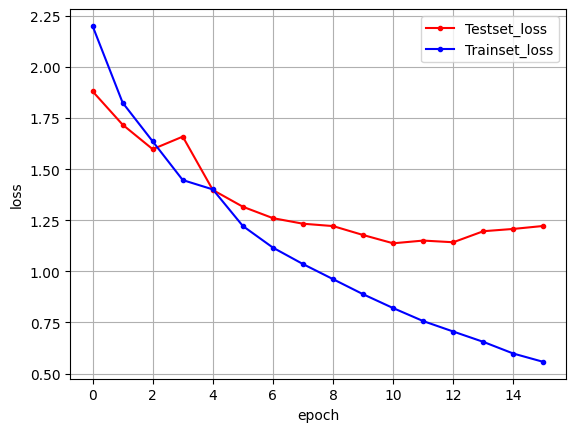

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [15]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [18]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 64)          0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 65s 125ms/step - loss: 0.4305 - accuracy: 0.7783 - val_loss: 0.2985 - val_accuracy: 0.8798
Epoch 2/100
469/469 [==============================] - 22s 47ms/step - loss: 0.2387 - accuracy: 0.9054 - val_loss: 0.2756 - val_accuracy: 0.8834
Epoch 3/100
469/469 [==============================] - 15s 31ms/step - loss: 0.1852 - accuracy: 0.9307 - val_loss: 0.2726 - val_accuracy: 0.8896
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1483 - accuracy: 0.9466 - val_loss: 0.2825 - val_accuracy: 0.8858
Epoch 5/100
469/469 [==============================] - 10s 22ms/step - loss: 0.1229 - accuracy: 0.9556 - val_loss: 0.3065 - val_accuracy: 0.8846
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3595 - accuracy: 0.8764

 Test Accuracy: 0.8764


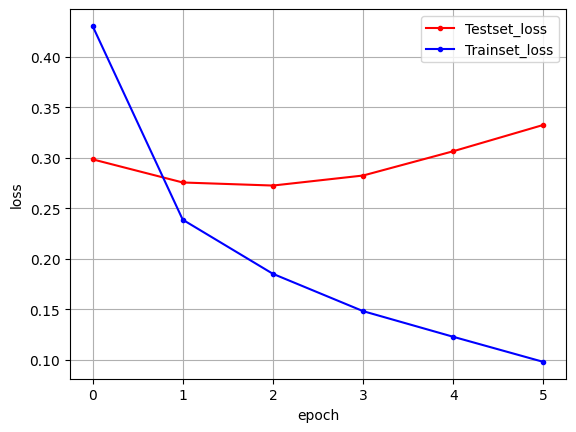

In [20]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

RNN 의 한계

- RNN 은 여러 개의 입력 값이 있을 때 이를 바로 처리하는 것이 아니라 잠시 가지고 있는 것
- 입력된 값끼리 서로 관련이 있다면 이를 모두 받아 두어야 적절한 출력 값을 만들 수 있음
- 맨 마지막 셀이 값을 디코더에 전달하는데, 이 마지막 셀에 담긴 값에 전체 문장의 뜻이 함축되어 있으므로 이를 문맥 벡터(context vector)라고 함
- 문제
    - 입력 값의 길이가 너무 길면 입력 받은 셀의 결과들이 너무 많아진다는 것
    - 입력이 길면 선두에서 전달 받은 결괏값이 중간에 희미해지기도 하고
    - 문맥 벡터가 모든 값을 제대로 디코더에 전달하기 힘들어지는 문제 발생

어텐션

- 인코더와 디코더 사이에 층이 하나 생김
- 새로 삽입된 층에는 각 셀로부터 계산된 스코어들이 모임
- 이 스코어를 이용해 소프트맥스 함수를 사용해서 어텐션 가중치를 만듬
이 가주이를 이용해 입력 값중 어떤 셀을 중점으로 볼지 결정
- 마지막 셀에 모든 입력이 집중되던 RNN 의 단점을 훌륭히 극복해낸 알고리즘

In [21]:
!pip install attention

In [22]:
from attention import Attention

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 78s 121ms/step - loss: 0.3722 - accuracy: 0.8276 - val_loss: 0.2797 - val_accuracy: 0.8838
Epoch 2/100
625/625 [==============================] - 33s 52ms/step - loss: 0.2189 - accuracy: 0.9145 - val_loss: 0.2667 - val_accuracy: 0.8891
Epoch 3/100
625/625 [==============================] - 26s 42ms/step - loss: 0.1600 - accuracy: 0.9377 - val_loss: 0.2957 - val_accuracy: 0.8872
Epoch 4/100
625/625 [==============================] - 24s 38ms/step - loss: 0.1157 - accuracy: 0.9560 - val_loss: 0.3347 - val_accuracy: 0.8748
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 0.4419 - accuracy: 0.8704

 Test Accuracy: 0.8704


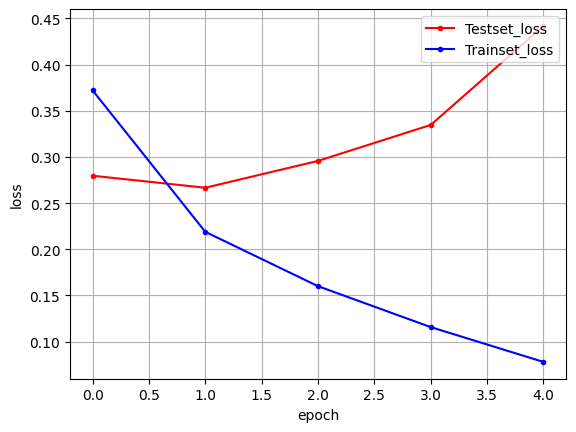

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()